# Dependencias

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer

import re
sns.set_theme()
import sys
import os
ruta_carpeta = os.path.abspath('../src')
if ruta_carpeta not in sys.path:
    sys.path.append(ruta_carpeta)
import utileria as ut
import nltk
nltk.download('punkt')

import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bcriv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Planos factoriales

In [35]:
terms = [
    'bueno',       
    'bien',        
    'aceptable',   
    'adecuado',    
    'virtuoso',    
    'justo',       
    'está bien',   
    'genial',      
    'increíble',   
    'excepcional', 
    'significativo', 
    'mejor',       
    'ok',           
    'bien',         
    'malo',         
    'horrible',     
    'peor',         
    'terrible',     
    'horrible',
]


In [36]:
model = SentenceTransformer('hackathon-pln-es/paraphrase-spanish-distilroberta')
modelos = ut.sentence_similarity(model,terms,2)

modelos.varianza_explicada()
modelos.componentes()

array([[ 3.7494934 , -2.2132833 ],
       [ 6.220342  , -3.4253638 ],
       [ 1.9704583 ,  1.9698057 ],
       [ 1.7685677 ,  3.1530218 ],
       [ 0.0168806 ,  2.121733  ],
       [ 3.6733418 , -0.4909259 ],
       [ 5.250027  , -1.966041  ],
       [ 0.47052523,  2.7727814 ],
       [-1.5312438 ,  0.19316137],
       [-1.9418387 ,  8.387541  ],
       [ 1.5908668 ,  4.9567947 ],
       [ 1.2118526 , -0.18922672],
       [ 3.0275483 , -1.3942864 ],
       [ 6.220342  , -3.4253626 ],
       [-4.2652016 , -2.1137738 ],
       [-7.3266983 , -1.9544444 ],
       [-5.3472304 , -2.481223  ],
       [-7.4313354 , -1.9464661 ],
       [-7.3266983 , -1.9544443 ]], dtype=float32)

In [37]:
cluster = modelos.k_means(3)
cluster.labels_

c:\Users\bcriv\miniconda3\envs\dydde\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1])

In [38]:
cluster.cluster_centers_[0]

array([ 4.1932783, -1.87207  ], dtype=float32)

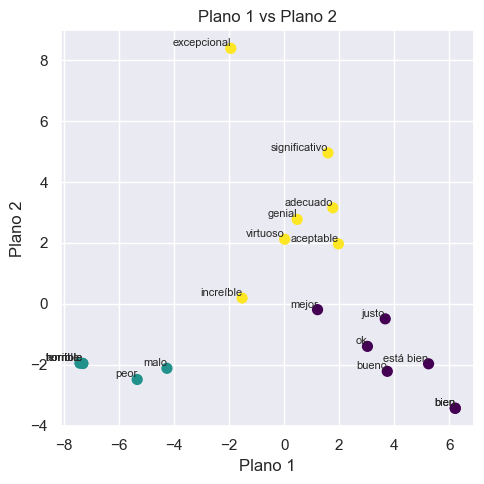

In [39]:
ut.graficos.plot_column_combinations(modelos.componentes(), cluster.labels_,terms)

In [40]:
with open('../input/palabras_vacias.txt', 'r') as file:
    stop_words = file.read().splitlines()

In [41]:
sentencias = [
    "La inteligencia artificial es fascinante.",
    "El aprendizaje automático tiene muchos usos.",
    "Las redes neuronales están revolucionando la tecnología.",
    "El futuro de la IA es prometedor."
]
sentencias = ut.limpieza_regex.limpieza_de_textos(sentencias=sentencias)
sentencias = ut.limpieza_regex.stop_words(stop_words,sentencias)
ut.graficos.generar_wordcloud(sentencias)


KeyboardInterrupt: 

# analisis de sentimientos 

In [9]:
ut.analisis_sentimientos(terms)

[0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, -1, -1, 0, -1, -1]

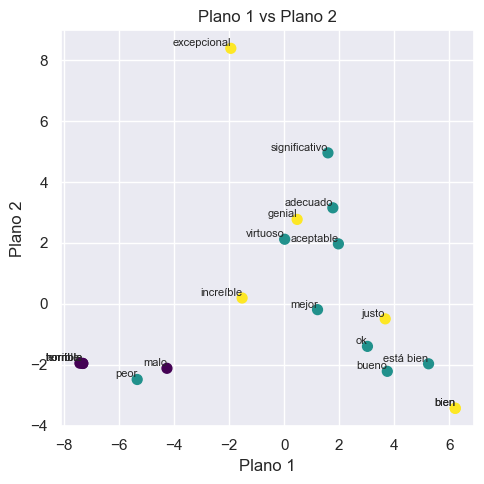

In [10]:
ut.graficos.plot_column_combinations(modelos.componentes(), ut.analisis_sentimientos(terms),terms)

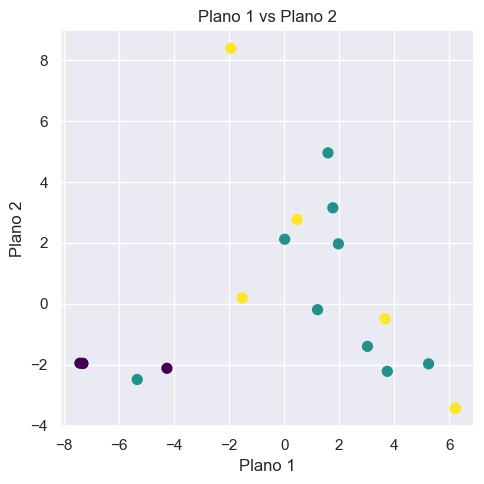

In [11]:
ut.graficos.plot_column_combinations(modelos.componentes(),colors=ut.analisis_sentimientos(terms))

# analisis de redes

In [68]:

def Generacion_de_skipgramas(text, n_palabras, k_saltos):
    
    '''Genera skipgrams de un texto dado con un tamaño de ventana n y un número de skips k.'''
    # Tokenize words
    words = nltk.word_tokenize(text)
    
    # Initialize list to store skipgrams
    skipgrams_list = []
    
    # Generate skipgrams
    for i in range(len(words)):
        # Create a window for the current position
        window = words[i:i+n_palabras+k_saltos]
        if len(window) < n_palabras:
            continue
        
        # Generate skipgrams from the window
        for j in range(len(window)):
            for k in range(j+1, min(j+1+k_saltos+1, len(window))):
                skipgram = (window[j], window[k])
                skipgrams_list.append(skipgram)
    skipgrams_list_final=[]
    for i in range(len(skipgrams_list)-1):
        if skipgrams_list[i]!=skipgrams_list[i+1]:
            skipgrams_list_final.append(skipgrams_list[i])
    return skipgrams_list_final

In [69]:
texto = ["""En los últimos 10 años, los depósitos de varios batallones del Ejército Nacional han venido siendo saqueados para vender armas y municiones en un mercado ilegal que va a parar a manos de grupos delincuenciales. Esa es la hipótesis que tiene la Fiscalía en contra de 50 miembros de una organización criminal compuesta hasta por militares activos y de la reserva que sacaron provecho de su poder en la institución para supuestamente traficar armamento.
(Puede ver: Fiscalía condecoró a investigadoras a cargo de desmantelar escándalo de corrupción en la UNGRD)
Los robos -que según el ente acusador puede ser tan rentable como el narcotráfico- se han producido desde el nivel central en Bogotá hasta regiones como la costa Caribe, Antioquia, Meta y Caquetá. Incluso, uno de los depósitos desde los que al parecer se han extraído armas queda a tres cuadras del búnker principal de la Fiscalía General: el batallón de Puente Aranda. 
El caso generó revuelo en el Gobierno. La semana pasada el ministro de Defensa, Iván Velásquez, rechazó contundentemente que grupos ilegales estén utilizando armas del Estado para atentar contra las tropas. “Resulta inadmisible, como tuvimos oportunidad de conocerlo recientemente, que integrantes de las Fuerzas Militares estén en tráfico de municiones, entregándole al enemigo las armas con las que matan a sus propios compañeros”, dijo el Ministro, anunciado que tomarán medidas estrictas para dar con los culpables.
(Le dejamos: Demanda que podría sacar del cargo al canciller Luis Gilberto Murillo llegó a Consejo de Estado)"""]
texto = ut.limpieza_regex.limpieza_de_textos(sentencias=texto)
texto = ut.limpieza_regex.stop_words(stop_words,texto)

texto
bigramas = Generacion_de_skipgramas(texto[0],2,1)


In [70]:
import igraph as ig

In [71]:
from collections import Counter


def creacion_del_grafo(aristas):
    # Crear un grafo
    G = ig.Graph()

    # Conjunto de nodos existentes
    nodos_existentes = set()

    # Añadir las aristas al grafo
    for arista, peso in aristas:
        nodo1, nodo2 = arista

        if nodo1 != nodo2: 

            # Verificar si los nodos ya existen
            if nodo1 not in nodos_existentes:
                G.add_vertex(nodo1)  # Agregar vértice origen
                nodos_existentes.add(nodo1)  # Agregar nodo al conjunto de nodos existentes
            if nodo2 not in nodos_existentes:
                G.add_vertex(nodo2)  # Agregar vértice destino
                nodos_existentes.add(nodo2)  # Agregar nodo al conjunto de nodos existentes

            # Agregar arista con peso
            G.add_edge(nodo1, nodo2, weight=peso)

    return G

def bigramas_para_grafo(lista_bigramas, umbral=10):
    # Utilizamos Counter para contar las ocurrencias de las tuplas en la lista
    lista_bigramas = [tuple(sorted(tupla)) for tupla in lista_bigramas]
    contador = Counter(lista_bigramas)
    
    # Filtramos las tuplas que tienen una frecuencia mayor que el umbral
    tuplas_filtradas = [(tupla ,frecuencia)for tupla, frecuencia in contador.items() if frecuencia > umbral]
    
    return tuplas_filtradas

In [81]:
def plot_bigramas(skipgramas,top_n=10):
    # Conteo de bigramas
    conteo_bigramas = Counter(skipgramas)

    # Obtener los 10 bigramas más frecuentes
    bigramas_mas_frecuentes = conteo_bigramas.most_common(top_n)

    # Obtener datos para el gráfico
    bigramas_unicos = [bigrama[0] for bigrama in bigramas_mas_frecuentes]
    frecuencias = [frecuencia for _, frecuencia in bigramas_mas_frecuentes]

    # Graficar
   
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(bigramas_unicos)), frecuencias, tick_label=[f"{bigrama[0]} {bigrama[1]}" for bigrama in bigramas_unicos])
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Bigramas')
    plt.ylabel('Frecuencia')
    plt.title(f'Top {top_n} Bigramas más Frecuentes')
    plt.show()
    return plt

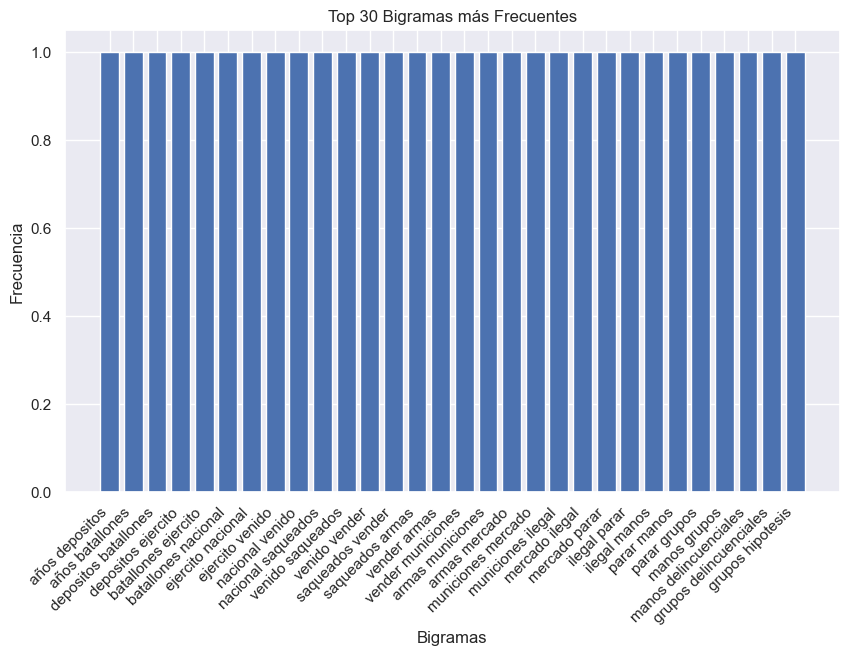

<module 'matplotlib.pyplot' from 'c:\\Users\\bcriv\\miniconda3\\envs\\dydde\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [82]:
plot_bigramas(bigramas,30)

In [78]:
g =  creacion_del_grafo(bigramas_para_grafo(bigramas,1))

In [79]:
def cluster_seleccion_componenteconexa_gigante(G, path_conexo_gigante,path_cluster):
    # Calcular la componente conexa gigante
    G_gigante = G.connected_components().giant()
    layout = G_gigante.layout("fr")
    # calcular la suma de los pesos de las aristas para cada nodo
    sum_pesos_aristas = G_gigante.strength(weights='weight')
    # Normalizar la suma de los pesos de las aristas para ajustarla al rango de tamaños de los nodos
    max_sum_pesos_aristas = max(sum_pesos_aristas)
    sizes = [x / max_sum_pesos_aristas * 40 for x in sum_pesos_aristas]  # Ajusta el rango de tamaño deseado
    G_gigante.vs["size"] = sizes
    ig.plot(G_gigante,path_conexo_gigante, layout=layout, bbox=(700, 700), margin=50,vertex_size=3,vertex_label_size=15,vertex_label_dist=2,edge_arrow_size=0.5,edge_width=0.5,vertex_label=G_gigante.vs['name'],vertex_color='lightblue',edge_color='gray')

    # Calcular la dendrograma de la comunidad
    dendrogram = G_gigante.community_edge_betweenness()

    # Obtener las comunidades finales
    communities = dendrogram.as_clustering()

    # Obtener el número de comunidades
    num_communities = len(communities)

    # Asignar colores a cada comunidad
    palette = ig.RainbowPalette(n=num_communities)
    community_colors = [palette.get(i) for i in communities.membership]

    # Definir transparencia para los nodos
    node_transparency = 0.5  # Valor entre 0 y 1, donde 0 es completamente transparente y 1 es completamente opaco

    # Convertir los colores de las comunidades a RGBA con la transparencia deseada
    community_colors_with_alpha = [color[:-1] + (node_transparency,) for color in community_colors]

    # Dibujar el grafo con nodos semi-transparentes
    ig.plot(G_gigante,path_cluster, layout=layout,vertex_color=community_colors_with_alpha)

    
    for community_id in range(num_communities):
        # Obtener los nodos de la comunidad actual
        community_nodes = [node for node, membership in enumerate(communities.membership) if membership == community_id]
        
        # Calcular el grado de cada nodo en la comunidad
        node_degrees = [G_gigante.degree(node) for node in community_nodes]
        
        # Encontrar el nodo con el mayor grado
        node_with_max_degree_index = node_degrees.index(max(node_degrees))
        node_with_max_degree = community_nodes[node_with_max_degree_index]
        
        # Obtener la palabra asociada al nodo con el mayor grado
        most_connected_word = G_gigante.vs[node_with_max_degree]['name']
        
        # Imprimir la palabra más importante de la comunidad actual
        print(f"Comunidad {community_id}: Palabra más importante (según grado): {most_connected_word}")
    return G_gigante

In [80]:
gigante = cluster_seleccion_componenteconexa_gigante(g,'../output/grafo_cph_texto_total_cluster.png','../output/grafo_cph_texto_total_cluster_comunidades.png')


InternalError: Error at src\_igraph\attributes.c:1701: No edge attribute named "weight" exists. -- Invalid value